## Explaining Linear Regression with Linear Algebra
As mentioned above, in the real world one will most likely never encounter data that lies exactly on a line. Thus, we resort to finding a best-fitting line through our data points. In order to get a better picture of how we can achieve this using Linear Algebra it could be useful to reduce the problem to its simplest form. Let's consider finding the best-fitting line through 3 non-colinear points, as described in the code below:


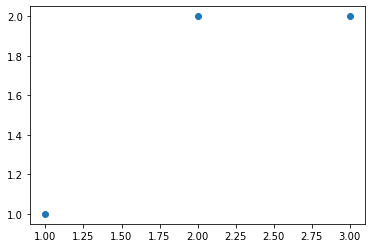

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3])
y = np.array([1, 2, 2])

plt.scatter(x, y)
#plt.axis([-5, 5, 0, 3])
plt.show()

In the figure above we are plotting the following points: $\large\{(1,1), (2,2), (3,2)\}$. Let's imagine that we are trying to define a line $y = c + ax$ that magically goes through all three points. We would define the following relations:


$$\large\begin{cases} c + 1a = 1 \\ c + 2a = 2 \\ c + 3a = 2 \end{cases}$$

We can rewrite this system of equations as the following matrix equation:

$$\large\textbf{Ax} = \textbf{b}  \Leftrightarrow \begin{bmatrix} 1 & 1 \\ 1 & 2 \\ 1 & 3 \end{bmatrix} 
\begin{bmatrix} c \\ a \end{bmatrix} = 
\begin{bmatrix} 1 \\ 2 \\ 2 \end{bmatrix}
$$

It is obvious from the standpoint of both Linear Algebra and Geometry that this is an unsolvable equation. Generally, equations of the form $\textbf{Ax} = \textbf{b}$ are solvable when $\textbf{b}$ is in the column space of $\textbf{A}$. Looking once again at the example above we see that it is not the case, especially when we write it down as follows:

$$
\large
c\begin{bmatrix} 1 \\ 1 \\ 1 \end{bmatrix} + d \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix} = \begin{bmatrix} 1 \\ 2 \\ 2 \end{bmatrix}
$$

Since this is unsolvable we would still want to see the best solution possible, that is, solve:
$$\large A \hat{x} = p$$
,where $\textbf{p}$ is a vector very close to $\textbf{b}$ as possible that is present in the column space of out matrix $\textbf{A}$ , that is, it can be written as a linear combination of columns of $\textbf{A}$. Notice that this time we replace $\textbf{x}$ by $\hat{x}$. This is in order to emphasise that, in fact, $\textbf{x}$ does not exist as a solution to the initial equation.

Let's go back now to the original equation 
$$\large Ax = b$$.
Notice that if $A$ were a square $n \times n$ invertible matrix, our job would be fairly straigh-forward:

$$
\begin{align}
\large Ax \large =&  \large b \\
\large A^{-1}Ax \large =& \large A^{-1}b \vert \cdot A^{-1} \\
\large x =& \large A^{-1}b
\end{align}
$$

However, most of the time, in real world situations, the matrix will have more rows than columns. This means that we must find some means to obtain an invertible square matrix on the left side:

$$
\begin{align}
\large A \hat{x} =& \large b \\
\large A^{T}A \hat{x} =& \large A^{T} b\\
\end{align}
$$

Voila! we know that $A^{T}A$ is invertible because it is square and we know that the initial matrix $A$ has full rank (all of its columns are linearly independent and therefore, all of its columns are pivot columns). We know from the rules of matrix multiplication that $A^{T}A$ will always produce an $n \times n$ matrix, where $n$ is the number of columns of $A$. We can now multiply both sides by $(A^{T} A)^{-1}$:
$$
\begin{align}
\large (A^{T} A)^{-1}A^{T}A \hat{x} =& \large (A^{T} A)^{-1} A^{T} b \\
\large \hat{x} =& \large (A^{T} A)^{-1} A^{T} b \\
\end{align}
$$

So we have obtained the best solution $\hat{x}$. Note that $\hat{x}$ contains the "weights" or the coeficients $c$ and $d$ of our best-fitting line. We can define a simple python function to do all the calculations for us:

In [18]:
def linearRegression(X, Y):
    weights = np.matmul(
                np.matmul(
                    np.linalg.inv(
                        np.matmul(
                            X.transpose(),
                            X)),
                    X.transpose()),
                Y)
    return weights

n = x.shape[0]
X = np.append(np.ones(n).reshape([n, 1]), x.reshape([n, 1]), axis=1)
y = y.reshape(n, 1)
wghts = linearRegression(X, y)
print(wghts)

[[0.66666667]
 [0.5       ]]


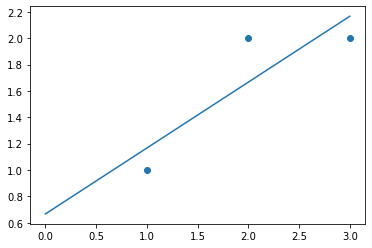

In [19]:
x1 = np.linspace(0, 3, 100)
y1 = wghts[0] + wghts[1] * x1

plt.scatter(x, y)
plt.plot(x1, y1)
#plt.axis([-5, 5, 0, 3])
plt.show()

This method is extendable to n dimensions. This means that we can have reasonably many "weights" to predict as long as we have more data points than variables to predict. The reason for this will be explained later. Let us explore the concept of Linear Regression extended to the 3-dimensional space. Now, instead of looking for a best-fitting line we are trying to produce a best-fitting plane through several points. It is harder to imagine this in higher-dimensional, but it is reasonable to state that we are dealing with some n-dimensional surface.

Let us generate some mock-up data on which we will apply our model:

In [36]:
X = np.random.uniform(0, 10, [100, 2])
row, col = X.shape
e = np.random.uniform(-5, 5, row)
Y = X[:, 0] * 2 + X[:, 1] + e

<code>X</code> is a $100 \times 2$ matrix with values generated randomly between $0$ and $10$ from an uniform distribution. The <code>e</code> variable will serve as the "noise" added to each data point such that it does not perfectly lie on a plane.

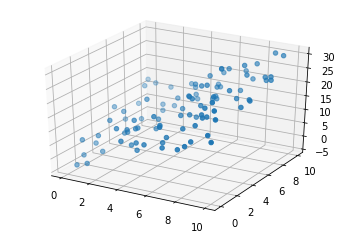

In [37]:
ax = plt.axes(projection="3d")
ax.scatter(X[:, 0], X[:, 1], Y)
plt.show()

Next, we need to add a column of ones to our <code>X</code> matrix in order to account for the free term. Then, we apply the previously-defined model which will return the weights and then use this to plot the best-fitting plane.

In [38]:
X.shape

(100, 2)

In [39]:
X = np.append(np.ones(row).reshape([row, 1]), X, axis=1)
wghts = linearRegression(X, Y) 
print(wghts)

[-0.63746718  1.93226669  1.08919969]


The results are somewhat to be expected, when we look back at the function that we have defined initially: <code> Y = X[:, 0] * 2 + X[:, 1] + e </code>. The weights that we have obtained after applying the Linear Regression model are in the vicinity of the coeficients in our original function.

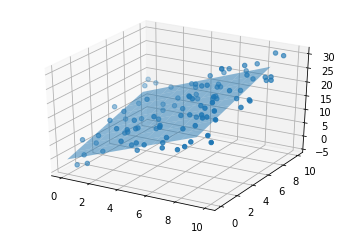

In [40]:
x, y = np.meshgrid(range(10), range(10))
z = wghts[0] + wghts[1] * x + wghts[2] * y

ax = plt.axes(projection="3d")
ax.scatter(X[:, 1], X[:, 2], Y)
ax.plot_surface(x, y, z, alpha=0.5)
plt.show()